In [1]:
 from julia import Julia
jl = Julia(sysimage = "/home/callum/ASF/Fitting/sys_model.so") #loading sys image

In [2]:
import matplotlib.pyplot as plt

import os
import tempfile
import numpy as np
import scipy as sp

from scipy import stats
import random as rd
from brokenaxes import brokenaxes

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [5]:
plt.style.use('seaborn-colorblind')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [6]:
def read_inputs(path,number):
    
    models = [1,2,3,4]
    
    if number not in models:
        raise Exception("Model number must be 1, 2, 3 or 4") 
        
    weights = np.genfromtxt(path + "/h{}_weights.csv".format(number), delimiter=',')
    params = np.genfromtxt(path + "/h{}_params.csv".format(number), delimiter=',')
    
    nparams = params.shape[1]
    
    p1_dis = stats.gaussian_kde(params[:,0],weights = weights)
    p2_dis = stats.gaussian_kde(params[:,1],weights = weights)
    
    if nparams == 2:
        return p1_dis, p2_dis
    elif nparams == 3:
        p3_dis = stats.gaussian_kde(params[:,2],weights = weights)
        return p1_dis, p2_dis, p3_dis
    

In [7]:
def distance_from_mean(store):
    
    mean_ep = 1.5
    std_ep = 0.604

    mean_pd = 75
    std_pd = 6.08

    mean_mt = 180
    std_mt = 36.475

    
    store_t = (store -[mean_ep, mean_pd, mean_mt]) / ([std_ep, std_pd, std_mt])
    
    d = np.linalg.norm(store_t,axis=1)
    
    mean = np.mean(d)
    c_95 = np.percentile(d,[2.5, 97.5])
    
    print('Mean distance = ', mean)
    print('95% confidence interval =', c_95)
    
    return d, mean, c_95

In [8]:
def run_simulations_inter(path,number,n_sims, value, network = "none", median = False):
    
    posteriors = read_inputs(path,number)
    
    n_params = len(posteriors) #two or three fitted parameters!
    
    dd = 0
    n_samples = 100000
    
    dp1 = posteriors[0].resample(n_samples)[0]
    dp2 = posteriors[1].resample(n_samples)[0]

    rd.shuffle(dp1)
    rd.shuffle(dp2)
    
    if n_params == 3:
        dp3 = posteriors[2].resample(n_samples)[0]
        rd.shuffle(dp3)
        
    if median:
        if n_params == 2:
            p = (np.median(dp1), np.median(dp2), value,number)
            
        elif n_params ==3:
             p = (np.median(dp1), np.median(dp2), np.median(dp3), value,number)
            
    for i in range(n_sims):
        
        if not median:
            if n_params == 2:
                p = (dp1[i], dp2[i], value,number)
            elif n_params ==3:
                p = (dp1[i], dp2[i], dp3[i], value,number)

        
        if n_params == 2:
            out = model_int(p)
        else:
            out = model_int(p, network)
        dd += out
  
    return dd


In [9]:
def simulate_intervention(mn,nsims,path, cs):
   
    dummy  = np.zeros(len(cs)) 
    for i, j in enumerate(cs):

        wa = (100-j)/100

        val = run_simulations_inter(path,mn,nsims, wa)
        red = round(100*val/n_sims,3)
        dummy[i] = red
        
    return dummy

# ODE model

In [510]:
jl.eval('push!(LOAD_PATH, "/home/callum/ASF/Fitting/ODE_Extinct.jl")')
jl.include('/home/callum/ASF/Fitting/ODE_Extinct.jl') #loading files with our model!

#Loading the four models!
model_int = jl.SIR_ODE.model_int #Frequency


/home/callum/.local/lib/python3.10/site-packages/julia/core.py:709: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


In [374]:
model_no = 1
n_sims = 1000

path = "/home/callum/ASF/Fitting/Posteriors/ODE/"


In [204]:
#ode1 = simulate_intervention(1,n_sims,path)
ode2 = simulate_intervention(2,n_sims,path, test_ode3)
ode3 = simulate_intervention(3,n_sims,path, test_ode3)
ode4 = simulate_intervention(4,n_sims,path, test_ode4)

In [362]:
start_path = np.linspace(0,55,12)

In [375]:
ode1s = simulate_intervention(1,n_sims,path,start_path)
ode2s = simulate_intervention(2,n_sims,path, start_path)
ode3s = simulate_intervention(3,n_sims,path, start_path)
ode4s = simulate_intervention(4,n_sims,path, start_path)

In [354]:
test_strengths = np.linspace(60,97.5,100)

In [382]:
xode1 = np.concatenate((start_path, test_strengths))
xode2 = np.concatenate((start_path, test_ode3))
xode4 = np.concatenate((start_path, test_ode4))

In [386]:
ode1f = np.concatenate((ode1s,ode1))
ode2f = np.concatenate((ode2s,ode2))
ode3f = np.concatenate((ode3s,ode3))
ode4f = np.concatenate((ode4s,ode4))

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100.])

In [398]:
extral = lo1[0:12]
extrau = uo1[0:12]

In [400]:
lo1 = np.concatenate((extral,lo1))
uo1 = np.concatenate((extral,uo1))

lo2 = np.concatenate((extral,lo2))
uo2 = np.concatenate((extral,uo2))

lo3 = np.concatenate((extral,lo3))
uo3 = np.concatenate((extral,uo3))

lo4 = np.concatenate((extral,lo4))
uo4 = np.concatenate((extral,uo4))

In [298]:
lo1 = np.load("/home/callum/lowerode1.npy")
lo2 = np.load("/home/callum/lowerode2.npy")
lo3 = np.load("/home/callum/lowerode3.npy")
lo4 = np.load("/home/callum/lowerode4.npy")

uo1 = np.load("/home/callum/upperode1.npy")
uo2 = np.load("/home/callum/upperode2.npy")
uo3 = np.load("/home/callum/upperode3.npy")
uo4 = np.load("/home/callum/upperode4.npy")

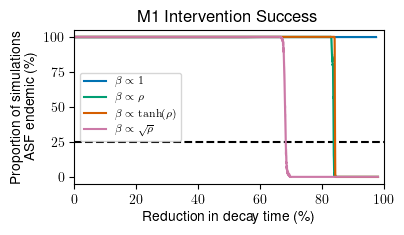

In [402]:
plt.figure(figsize = (4,2))
plt.hlines(25,0,100, color = "k", ls='--')

plt.plot(xode1,ode1f, label = r"$\beta \propto 1$", color = colors[0]) 
plt.plot(xode2,ode2f, label = r"$\beta \propto \rho$", color = colors[1]) 
plt.plot(xode2,ode3f, label = r"$\beta \propto \tanh(\rho)$", color = colors[2]) 
plt.plot(xode4,ode4f, label = r"$\beta \propto \sqrt \rho$", color = colors[3]) 
plt.title("M1 Intervention Success")
plt.xlabel("Reduction in decay time (\%)")
plt.ylabel("Proportion of simulations\nASF endemic (\%)")
plt.legend(loc = 6,fontsize=8)

plt.fill_between(xode1, lo1*100, uo1*100, color=colors[0], alpha=0.25)
plt.fill_between(xode2, lo2*100, uo2*100, color=colors[1], alpha=0.25)

plt.fill_between(xode2, lo3*100, uo3*100,color=colors[2], alpha=0.25)
plt.fill_between(xode4, lo4*100, uo4*100,color=colors[3], alpha=0.25)
plt.xlim([0,100])
plt.savefig('ode_intervention.pdf', format='pdf', bbox_inches='tight')


# TAU Homogeneous 

In [538]:
jl.eval('push!(LOAD_PATH, "/home/callum/ASF/Fitting/TAU_HOMO_EXTINCT.jl")')
jl.include('/home/callum/ASF/Fitting/TAU_HOMO_EXTINCT.jl') #loading files with our model!

#Loading the four models!
model_int = jl.SIR_TAU_S.model_int #Frequency

/home/callum/.local/lib/python3.10/site-packages/julia/core.py:709: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


In [539]:
#test_strengths = np.linspace(0.01,1.0,10)[::-1]
test_strengths = np.linspace(0,97.5,100)
#round(100-test_strengths*100,3)


In [285]:
l1 = np.load("/home/callum/lower1.npy")
l4 = np.load("/home/callum/lower4.npy")

u1 = np.load("/home/callum/upper1.npy")
u4 = np.load("/home/callum/upper4.npy")



In [534]:
model_no = 1
n_sims = 1000

path = "/home/callum/ASF/Fitting/Posteriors/Tau-Homogeneous/"


In [540]:
store_zero4t = np.zeros(len(test_strengths)) 
for i, j in enumerate(test_strengths): 
    
    rr = (100 - j)/100
    
    val = run_simulations_inter(path,model_no,n_sims, rr)
    red = round(100*val/n_sims,3)
    store_zero4t[i] = red

In [481]:
cl1 = np.load("/home/callum/ltauc1.npy")
cl4 = np.load("/home/callum/ltauc4.npy")

cu1 = np.load("/home/callum/utauc1.npy")
cu4 = np.load("/home/callum/utauc4.npy")


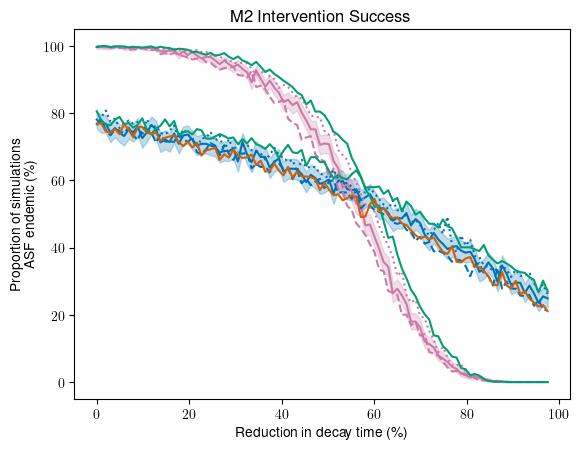

In [542]:
plt.plot(taux,store_tau1, label = r"$\beta \propto 1$", color = colors[0]) 
plt.plot(taux,store_tau4, label = r"$\beta \propto \sqrt \rho$", color = colors[3]) 

plt.plot(taux,store_six1, label = r"$\beta \propto 1$", color = colors[0], ls ='--') 
plt.plot(taux,store_six4, label = r"$\beta \propto \sqrt \rho$", color = colors[3], ls ='--') 

plt.plot(taux,store_one1, label = r"$\beta \propto 1$", color = colors[0], ls =':') 
plt.plot(taux,store_one4, label = r"$\beta \propto \sqrt \rho$", color = colors[3], ls =':') 


plt.plot(taux,store_zero1, label = r"$\beta \propto 1$", color = colors[1], ls ='-') 
plt.plot(taux,store_zero4, label = r"$\beta \propto \sqrt \rho$", color = colors[1], ls ='-') 

plt.plot(taux,store_zero4t, label = r"$\beta \propto \sqrt \rho$", color = colors[2], ls ='-') 

plt.title("M2 Intervention Success")
plt.xlabel("Reduction in decay time (\%)")
plt.ylabel("Proportion of simulations\nASF endemic (\%)")

plt.fill_between(test_strengths, l1*100, u1*100,color=colors[0], alpha=0.25)

plt.fill_between(test_strengths, l4*100, u4*100,color=colors[3], alpha=0.25)

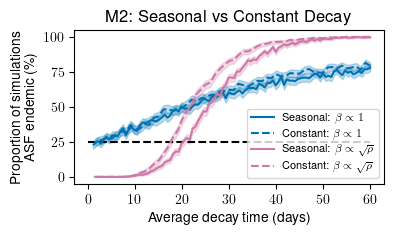

In [551]:
plt.figure(figsize = (4,2))
plt.hlines(25,0,60, color = "k", ls='--')

plt.plot((1-taux/100)*60, store_tau1, color = colors[0], label =  r"Seasonal: $\beta \propto 1$")
plt.plot(test_max_day,store_exp1, color = colors[0], ls = "--", label =  r"Constant: $\beta \propto 1$")

plt.plot((1-taux/100)*60, store_tau4, color = colors[3], label =  r"Seasonal: $\beta \propto \sqrt \rho$")
plt.plot(test_max_day,store_exp4, color = colors[3], ls = "--", label =  r"Constant: $\beta \propto \sqrt \rho$")

plt.fill_between((1-taux/100)*60, l1*100, u1*100,
                 color=colors[0], alpha=0.25)

plt.fill_between((1-taux/100)*60, l4*100, u4*100,
                 color=colors[3], alpha=0.25)

plt.fill_between(test_max_day, cl1*100, cu1*100,
                 color=colors[0], alpha=0.25)

plt.fill_between(test_max_day, cl4*100, cu4*100,
                 color=colors[3], alpha=0.25)

plt.title("M2: Seasonal vs Constant Decay")
plt.xlabel("Average decay time (days)")
plt.ylabel("Proportion of simulations\nASF endemic (\%)")

leg = plt.legend(fontsize=8)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.savefig('pulse_const.pdf', format='pdf', bbox_inches='tight')


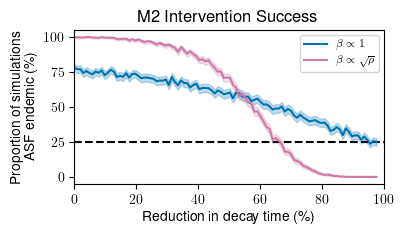

In [403]:
test_strengths = np.linspace(0,97.5,100)


plt.figure(figsize = (4,2))
plt.hlines(25,0,100, color = "k", ls='--')
plt.plot(test_strengths,store_tau1, label = r"$\beta \propto 1$", color = colors[0]) 
plt.plot(test_strengths,store_tau4, label = r"$\beta \propto \sqrt \rho$", color = colors[3]) 
plt.title("M2 Intervention Success")
plt.xlabel("Reduction in decay time (\%)")
plt.ylabel("Proportion of simulations\nASF endemic (\%)")

plt.fill_between(test_strengths, l1*100, u1*100,
                 color=colors[0], alpha=0.25)

plt.fill_between(test_strengths, l4*100, u4*100,
                 color=colors[3], alpha=0.25)

plt.legend(fontsize=8)
plt.xlim([0,100])
#plt.ylim([0,105])
plt.savefig('tau_homogeneous_intervention.pdf', format='pdf', bbox_inches='tight')


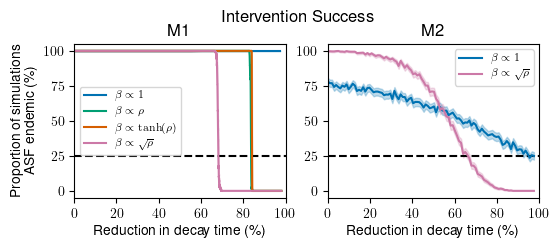

In [550]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6,2))
fig.suptitle('Intervention Success', y=1.05)


ax1.hlines(25,0,100, color = "k", ls='--')

ax1.plot(xode1,ode1f, label = r"$\beta \propto 1$", color = colors[0]) 
ax1.plot(xode2,ode2f, label = r"$\beta \propto \rho$", color = colors[1]) 
ax1.plot(xode2,ode3f, label = r"$\beta \propto \tanh(\rho)$", color = colors[2]) 
ax1.plot(xode4,ode4f, label = r"$\beta \propto \sqrt \rho$", color = colors[3]) 
ax1.set_title("M1")
ax1.set_xlabel("Reduction in decay time (\%)")
ax1.set_ylabel("Proportion of simulations\nASF endemic (\%)")
ax1.legend(loc = 6,fontsize=8)

ax1.fill_between(xode1, lo1*100, uo1*100, color=colors[0], alpha=0.25)
ax1.fill_between(xode2, lo2*100, uo2*100, color=colors[1], alpha=0.25)

ax1.fill_between(xode2, lo3*100, uo3*100,color=colors[2], alpha=0.25)
ax1.fill_between(xode4, lo4*100, uo4*100,color=colors[3], alpha=0.25)
ax1.set_xlim([0,100])


taux = np.linspace(0,97.5,100)
ax2.hlines(25,0,100, color = "k", ls='--')
ax2.plot(taux,store_tau1, label = r"$\beta \propto 1$", color = colors[0]) 
ax2.plot(taux,store_tau4, label = r"$\beta \propto \sqrt \rho$", color = colors[3]) 
ax2.set_title("M2")
ax2.set_xlabel("Reduction in decay time (\%)")

ax2.fill_between(taux, l1*100, u1*100,color=colors[0], alpha=0.25)
ax2.fill_between(taux, l4*100, u4*100,color=colors[3], alpha=0.25)

ax2.legend(fontsize=8)
ax2.set_xlim([0,100])
plt.savefig('m1m2inter.pdf', format='pdf', bbox_inches='tight')


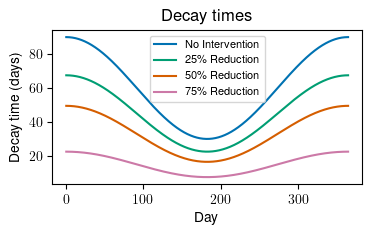

In [552]:
plt.figure(figsize = (4,2))
x = np.linspace(0,365,1000)
y = 60 + 30*np.cos(x*2*np.pi/365)
plt.plot(x,y, label = "No Intervention")
plt.plot(x,0.75*y, label = "25\% Reduction")
plt.plot(x,0.55*y, label = "50\% Reduction")
plt.plot(x,0.25*y, label = "75\% Reduction")
plt.legend(fontsize=8)
plt.ylabel("Decay time (days)")
plt.xlabel("Day")
plt.title("Decay times")
plt.savefig('decay_length.pdf', format='pdf', bbox_inches='tight')



In [436]:
store_tau4[66:69]

array([27.8, 25.8, 23.3])

In [437]:
taux[66:69]

array([65.        , 65.98484848, 66.96969697])

In [438]:
60*(1-.66)

20.4

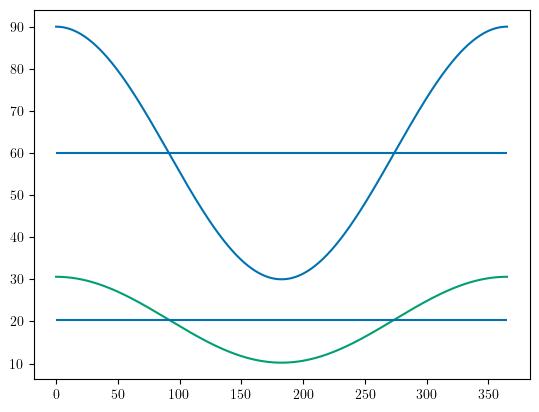

In [442]:
plt.plot(x,y, label = "No Intervention")

plt.plot(x,0.34*y, label = "75\% Reduction")
plt.hlines(60,0,365)
plt.hlines(20.4,0,365)

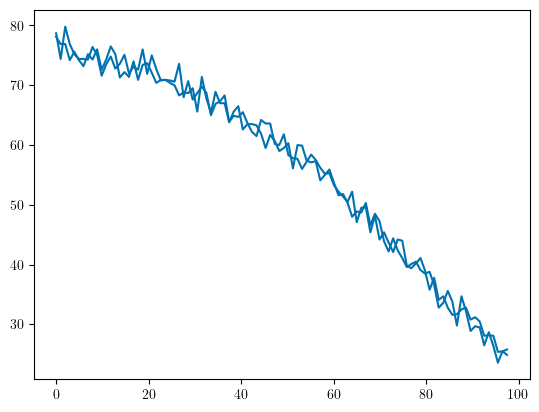

In [339]:
plt.plot(test_strengths,store_tau1, label = r"$\beta \propto 1$", color = colors[0]) 
plt.plot(test_strengths,store_tau11, label = r"$\beta \propto 1$", color = colors[0]) 


In [10]:
jl.eval('push!(LOAD_PATH, "/home/callum/ASF/Fitting/TAU_HETRO_Extinct.jl")')
jl.include('/home/callum/ASF/Fitting/TAU_HETRO_Extinct.jl') #loading files with our model!

#Loading the four models!
model_int = jl.SIR_TAU_I.model_int #Frequency

/home/callum/.local/lib/python3.10/site-packages/julia/core.py:709: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


In [558]:
sample_path = "/home/callum/ASF/Fitting/Posteriors/Tau-Hetrogeneous/Random//"
m_number = 1

In [560]:
len(read_inputs(sample_path, 1))

3

In [ ]:
def run_simulations_inter(path,number,n_sims, value, network = "none", median = False):


In [19]:
path = "Posteriors/Tau-Hetrogeneous/Random/"
mo_no = 4
n_sims = 100
network = 'r'

In [11]:
def simulate_intervention(path, mo_no, n_sims, network):
    cs = np.linspace(.1,1, 19)[::-1]
    dummy  = np.zeros(len(cs)) 
    for i, j in enumerate(cs):

        val = run_simulations_inter(path, mo_no, n_sims, j, network=network)
        red = val/n_sims
        dummy[i] = red
        
    return dummy

In [21]:
n_sims = 250

In [22]:
#Random!
path = "Posteriors/Tau-Hetrogeneous/Random/"
network = 'r'
mo_no = 1
r1_int = simulate_intervention(path, mo_no, n_sims, network)
print("Done")
mo_no = 4
r4_int = simulate_intervention(path, mo_no, n_sims, network)

Done


In [23]:
np.save("r1_int",r1_int)
np.save("r4_int",r4_int)

In [ ]:
#Scale Free!
path = "Posteriors/Tau-Hetrogeneous/Scale_Free/"
network = 'sf'
mo_no = 1
sf1_int = simulate_intervention(path, mo_no, n_sims, network)
print("Done")
mo_no = 4
sf4_int = simulate_intervention(path, mo_no, n_sims, network)

Done


In [ ]:
np.save("sf1_int",sf1_int)
np.save("sf4_int",sf4_int)

In [ ]:
#Random!
path = "Posteriors/Tau-Hetrogeneous/Small_Worlds//"
network = 'sw'
mo_no = 1
sw1_int = simulate_intervention(path, mo_no, n_sims, network)
print("Done")
mo_no = 4
sw4_int = simulate_intervention(path, mo_no, n_sims, network)

In [ ]:
np.save("sw1_int",sw1_int)
np.save("sw4_int",sw4_int)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r1_int = np.load("r1_int.npy")
r4_int = np.load("r4_int.npy")

In [4]:
x = 100*(1- np.linspace(.1,1, 19)[::-1,])

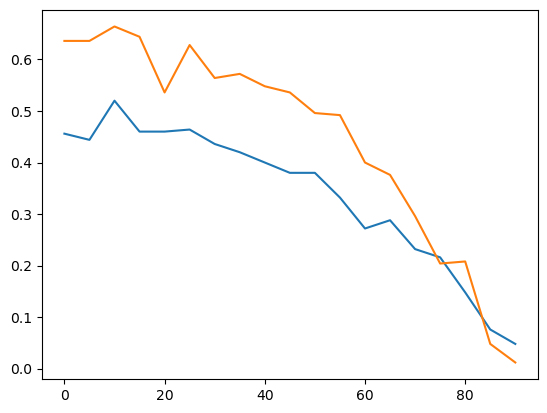

In [5]:
plt.plot(x, r1_int)
plt.plot(x, r4_int)